In [1]:
import pandas as pd
import os

In [3]:
n, s = map(int, input().split())
prices = list(map(int, input().split()))

# Находим максимальную цену, которую ковбой Джо может себе позволить
max_affordable_price = max([price for price in prices if price <= s], default=0)

print(max_affordable_price)

10


In [9]:
word = [w for w in "sheriff"][:-1]
print(word)

['s', 'h', 'e', 'r', 'i', 'f']


In [14]:
word = [w for w in "sheriff"][:-1]
string_ = input()
letter_count = []
for w in word:
    d = 0
    for s in string_:
        if w == s:
            d = d +1
        else: pass
    letter_count.append(d)

print(string_, letter_count)
letter_count[-1] = letter_count[-1]  / 2
print(string_, letter_count)
print(min(letter_count))


fheriherffazfszkisrrs [3, 2, 2, 4, 2, 4]
fheriherffazfszkisrrs [3, 2, 2, 4, 2, 2.0]
2


In [42]:
n, m = map(int, input().split())
nominations = list(map(int, input().split()))
nominations.sort(reverse=True)

result = []
amount_left = n

for nom in nominations:
    count = min(amount_left // nom, 2)
    
    if count > 0:
        result.extend([nom] * count)
        amount_left -= count * nom

if amount_left == 0:
    result.sort(reverse=False)
    print(len(result))
    print(" ".join(map(str, result)))
else:
    print(-1)


3
1 2 2


In [26]:
# n, m = map(int, input().split())
# nominations = sorted(list(set(map(int, input().split()))))  # Удаляем дубликаты и сортируем номиналы
n = 5
m = 2
nominations = [1,2]

# Создаем массив, в котором будем хранить количество купюр каждого номинала
#counts = [0] * len(nominations)
counts = [2,2]
# Функция, которая проверяет, можно ли украсть сумму n с использованием купюр
def can_steal(amount, index):
    if amount == 0:
        return True
    if amount < 0 or index < 0:
        return False
    if counts[index] > 0 and can_steal(amount - nominations[index], index):
        counts[index] -= 1
        return True
    return can_steal(amount, index - 1)

if can_steal(n, len(nominations) -1 ):
    stolen = []
    for i in range(len(nominations) - 1):
        while n >= nominations[i] and counts[i] > 0:
            stolen.append(nominations[i])
            n -= nominations[i]
            counts[i] -= 1
    print(len(stolen))
    print(" ".join(map(str, stolen)))
else:
    print(-1)


1
1


In [30]:
n = int(input())
seq_ = list(map(int, input().split()))
win_seq = list(map(int, input().split()))
l_id = 0
r_id = n - 1

while l_id < n and seq_[l_id] == win_seq[l_id]:
    l_id += 1

while r_id >= 0 and seq_[r_id] == win_seq[r_id]:
    r_id -= 1

if l_id <= r_id and sorted(seq_[l_id:r_id + 1]) == win_seq[l_id:r_id + 1]:
    print("YES")
else:
    print("NO")


NO


In [ ]:
2 2 
1 2 6 
2 1 9

In [43]:
def can_maintain_states(graph, x, n):
    visited = [False] * n
    states = 0

    def dfs(node):
        visited[node] = True
        for neighbor, length in graph[node]:
            if not visited[neighbor] and length > x:
                dfs(neighbor)

    for node in range(n):
        if not visited[node]:
            states += 1
            dfs(node)

    return states == 1  # Если количество штатов равно 1, условие выполняется

def binary_search(graph, n, m):
    left, right = 0, max(graph, key=lambda x: x[1])[1]
    result = -1

    while left <= right:
        mid = (left + right) // 2
        if can_maintain_states(graph, mid, n):
            result = mid
            right = mid - 1
        else:
            left = mid + 1

    return result

n, m = map(int, input().split())
graph = [[] for _ in range(n)]

for _ in range(m):
    v, u, w = map(int, input().split())
    graph[v - 1].append((u - 1, w))
    graph[u - 1].append((v - 1, w))

result = binary_search(graph, n, m)
print(result)


TypeError: '<=' not supported between instances of 'int' and 'tuple'

In [51]:
def is_possible(graph, x, n):
    visited = [False] * n
    num_states = 0

    def dfs(node):
        visited[node] = True
        for neighbor in graph[node]:
            if not visited[neighbor] and neighbor <= x:
                dfs(neighbor)

    for i in range(n):
        if not visited[i]:
            num_states += 1
            dfs(i)

    return num_states

def find_x(graph, n, m):
    left, right = 0, max(max(edge[1] for edge in graph))
    result = -1

    while left <= right:
        mid = (left + right) // 2
        if is_possible(graph, mid, n) == 1:  # Измените это значение на необходимое количество штатов
            result = mid
            right = mid - 1
        else:
            left = mid + 1

    return result

n, m = map(int, input().split())
graph = [[] for _ in range(n)]

for _ in range(m):
    v, u, w = map(int, input().split())
    graph[v - 1].append(w)
    graph[u - 1].append(w)

x = find_x(graph, n, m)
print(x)


TypeError: 'int' object is not iterable

In [31]:
def count_states(graph, max_length):
    visited = [False] * len(graph)
    states = 0

    def dfs(node):
        visited[node] = True
        for neighbor, length in graph[node]:
            if not visited[neighbor] and length <= max_length:
                dfs(neighbor)


    for node in range(len(graph)):
        if not visited[node]:
            states += 1
            dfs(node)

    return states

def binary_search(graph, n, max_length):
    left, right = 1, max_length
    result = -1

    while left <= right:
        mid = (left + right) // 2
        states = count_states(graph, mid)

        if states == n:
            result = mid
            right = mid - 1
        elif states < n:
            right = mid - 1
        else:
            left = mid + 1

    return result

n, m = 2, 2
graph = [[] for _ in range(n)]
max_length = 0

for _ in range(m):
    v, u, w = map(int, input().split())
    graph[v - 1].append((u - 1, w))
    graph[u - 1].append((v - 1, w))
    max_length = max(max_length, w)

result = binary_search(graph, n, max_length)
print(result)


1


In [27]:
stolen

[1]

In [20]:
counts

[0, 0]

In [18]:
nominations

[1, 2]

In [11]:
letter_count

[3, 2, 2, 4, 2, 4]

In [19]:
# Specify the directory path you want to list files from
folder_path = 'C:/Users/alitu/Desktop/biometric/Implementation-patchnet/dataset/train/live'

# Get a list of all files in the folder
file_names = os.listdir(folder_path)
df = pd.DataFrame(file_names, columns=['image_name'])
df['label'] = 1.0

In [21]:
# Specify the directory path you want to list files from
folder_path = 'C:/Users/alitu/Desktop/biometric/Implementation-patchnet/dataset/train/spoof'

# Get a list of all files in the folder
file_names = os.listdir(folder_path)

In [22]:
df_ = pd.DataFrame(file_names, columns=['image_name'])
df_['label'] = 0.0

In [25]:
df = df.append(df_)

In [29]:
df.to_csv('train.csv')

In [28]:
df[df.duplicated(subset = ['image_name'])]

,image_name,label


In [30]:
folder_path = 'C:/Users/alitu/Desktop/biometric/Implementation-patchnet/dataset/test/live'
file_names = os.listdir(folder_path)
df_test = pd.DataFrame(file_names, columns=['image_name'])
df_test['label'] = 1.0
folder_path = 'C:/Users/alitu/Desktop/biometric/Implementation-patchnet/dataset/test/spoof'
file_names = os.listdir(folder_path)
df_test_ = pd.DataFrame(file_names, columns=['image_name'])
df_test_['label'] = 0.0
df_test = df_test.append(df_test_)

In [33]:
df_test.to_csv('test.csv')

In [34]:
folder_path = 'C:/Users/alitu/Desktop/biometric/Implementation-patchnet/dataset/val/live'
file_names = os.listdir(folder_path)
df_val = pd.DataFrame(file_names, columns=['image_name'])
df_val['label'] = 1.0
folder_path = 'C:/Users/alitu/Desktop/biometric/Implementation-patchnet/dataset/val/spoof'
file_names = os.listdir(folder_path)
df_val_ = pd.DataFrame(file_names, columns=['image_name'])
df_val_['label'] = 0.0
df_val = df_val.append(df_val_)

In [36]:
df_val.to_csv('val.csv')

In [10]:
df = pd.read_csv("C:\\Users\\alitu\\Desktop\\biometric\\Implementation-patchnet\\training_metrics.csv")

In [11]:
df

,epoch,train_loss,train_acc,val_loss,val_acc
0,0,14.642404,0.551111,14.713888,0.514286
1,1,11.284529,0.660000,13.855291,0.595238
2,2,11.302472,0.660000,11.780182,0.638095
3,3,11.126473,0.648889,12.691539,0.619048
4,4,9.571818,0.686667,14.511903,0.604762
...,...,...,...,...,...
95,95,1.246070,0.964444,6.192237,0.847619
96,96,1.160803,0.973333,6.449616,0.847619
97,97,1.928639,0.942222,13.643195,0.695238
98,98,1.235776,0.955556,4.318785,0.880952


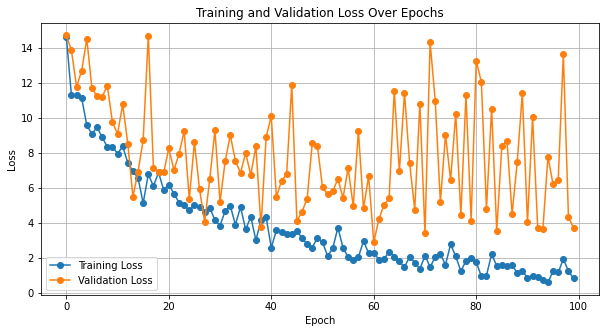

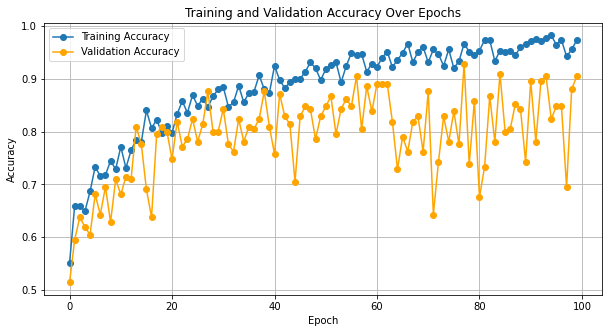

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV into a DataFrame


# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['train_loss'], label='Training Loss', marker='o')
plt.plot(df['epoch'], df['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)

# Create a separate figure for accuracy
plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['train_acc'], label='Training Accuracy', marker='o')
plt.plot(df['epoch'], df['val_acc'], label='Validation Accuracy', marker='o', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)

plt.show()